# FINAL PROJECT 

The data which used in this project is pulled from https://github.com/statsbomb/open-data/tree/master/data. Vri dünydaki birçok farklı ligin birçok sezonun kapsamlı şkelide hazırlanmış  verilerini içermekte. Bu projede bu veriler kullanılarak oluşturulan verisetleri üzerine analizler ver yorumlar yapıldı.

Libraries About the libraries used in this project and what they are used for:

1. Pandas--> The Pandas library was used for processing, transforming and saving data in specific formats.
2. request--> since the data is retrieved from the internet environment, it is used to easily retrieve this data
3. mplsoccer--> this library was used to process football data on the football pitch. Also this library allows to access the data of Statsbomb without using another library. this way was used to access the data in some places.
4. networkx--> In some of the problems, operations were done with graphs. This library was preferred to make these operations easier.
5. gravis--> gravis library was preferred to visualise problems related to relationships.
6. seaborn--> Seaborn library chosed for drawing statistical graphs

### 0

Functions used throughout the project.

In [87]:
from mplsoccer import Sbopen 
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import gravis as gv 

The seasons and leagues owned by the dataset were sorted using the mplsoccer library.

In [4]:
competitions = Sbopen().competition()
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
65,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
66,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
67,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
68,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


function to get the data of that season by using the season and league ids in competititions.

In [5]:
def opseason(comp_id,season_id):
    url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/"+str(comp_id)+"/"+str(season_id)+".json"
    response = requests.get(url)
    json_data = response.json()
    season = pd.DataFrame(json_data)
    return season

In [7]:
opseason(9,27)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,3890561,2016-05-14,15:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 175, 'home_team_name': 'Hoffe...","{'away_team_id': 181, 'away_team_name': 'Schal...",1,4,available,unscheduled,2023-07-24T07:47:12.510532,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",34,"{'id': 1, 'name': 'Regular Season'}","{'id': 4541, 'name': 'PreZero Arena', 'country...","{'id': 186, 'name': 'Felix Brych', 'country': ..."
1,3890505,2016-04-02,15:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 169, 'home_team_name': 'Bayer...","{'away_team_id': 184, 'away_team_name': 'Eintr...",1,0,available,unscheduled,2023-08-03T13:14:14.503553,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 4867, 'name': 'Allianz Arena', 'country...","{'id': 1008758, 'name': 'Florian Meyer', 'coun..."
2,3890511,2016-04-08,20:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 173, 'home_team_name': 'Herth...","{'away_team_id': 178, 'away_team_name': 'Hanno...",2,2,available,unscheduled,2023-08-06T05:50:38.345688,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 367, 'name': 'Olympiastadion Berlin', '...","{'id': 235, 'name': 'Benjamin Brand', 'country..."
3,3890515,2016-04-09,15:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 171, 'home_team_name': 'Hambu...","{'away_team_id': 872, 'away_team_name': 'Darms...",1,2,available,unscheduled,2023-07-18T17:52:17.363623,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 379, 'name': 'Volksparkstadion', 'count...","{'id': 1008767, 'name': 'Peter Sippel', 'count..."
4,3890411,2015-12-20,16:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 173, 'home_team_name': 'Herth...","{'away_team_id': 177, 'away_team_name': 'FSV M...",2,0,available,unscheduled,2023-07-16T13:47:06.565811,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",17,"{'id': 1, 'name': 'Regular Season'}","{'id': 367, 'name': 'Olympiastadion Berlin', '...","{'id': 1008767, 'name': 'Peter Sippel', 'count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,3890263,2015-08-15,15:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 177, 'home_team_name': 'FSV M...","{'away_team_id': 189, 'away_team_name': 'Ingol...",0,1,available,unscheduled,2023-07-12T21:36:52.313207,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",1,"{'id': 1, 'name': 'Regular Season'}","{'id': 374, 'name': 'Mewa Arena', 'country': {...","{'id': 227, 'name': 'Guido Winkmann', 'country..."
302,3890262,2015-08-15,15:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 872, 'home_team_name': 'Darms...","{'away_team_id': 178, 'away_team_name': 'Hanno...",2,2,available,unscheduled,2023-07-13T06:06:10.566448,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",1,"{'id': 1, 'name': 'Regular Season'}","{'id': 548, 'name': 'Merck-Stadion am Böllenfa...","{'id': 186, 'name': 'Felix Brych', 'country': ..."
303,3890261,2015-08-15,18:30:00.000,"{'competition_id': 9, 'country_name': 'Germany...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 180, 'home_team_name': 'Borus...","{'away_team_id': 185, 'away_team_name': 'Borus...",4,0,available,unscheduled,

function that retrieves the ids of the matches in the season and returns the data of that match

In [9]:
def opurl(ID):
    
    url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/"+str(ID)+ ".json"
    response = requests.get(url)
    json_data = response.json()
    df = pd.DataFrame(json_data)
    return df

In [10]:
opurl(3890561)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,foul_won,shot,goalkeeper,duel,dribble,out,clearance,block,ball_recovery,substitution
0,41bd60ac-9b2c-4cb8-85aa-23ae71825c1e,1,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fbca533d-f3f4-4a86-b4a3-4fcae63592cf,2,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b15ba6b1-61ac-4d9c-b2a3-096ce31bcf01,3,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,442128f8-2e38-491c-bf1e-b336e91757fa,4,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,644e16d7-10ca-45f0-8128-fc0055d6f753,5,1,00:00:00.482,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,477e64e8-beee-40f4-a44d-c9d23ecde0bc,3936,2,00:46:00.510,91,0,"{'id': 43, 'name': 'Carry'}",171,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3936,dd30f9cc-5c0c-4e2c-8321-c9b8661fe29d,3937,2,00:46:02.478,91,2,"{'id': 30, 'name': 'Pass'}",171,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3937,5958b582-9bef-49ca-9dd9-3e9033aeb48f,3938,2,00:46:05.235,91,5,"{'id': 17, 'name': 'Pressure'}",171,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3938,2ce56777-0bcf-4ffc-8e4e-a4ac668a08df,3939,2,00:46:06.250,91,6,"{'id': 34, 'name': 'Half End'}",171,"{'id': 175, 'name': 'Hoffenheim'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this way, access to the dataframe with the data to be processed was provided. This is the main dataset that will be used for calculations in the project.

### 1-Goalkeeper-xG relation

xG is a metric which calculating by historical data of a shot's location. This way every shot has an approxiamaiton of their goal probablity. In this problem, this metri will be use for goalkeepers save ranking. Main idea is if a goalkeeper can save the shots has higher xG, it can be said to be he's better. This way, goalkeepers can be sorted their save and xG ratings.

This function is taking a season and giving the dataframe of saved shots, xG and the result of the shot. Also this function find the player who takes the shot with using "related_event" data. This data,if exists, is holding the id of related events In this function, every information that needed is chosing with their appopirate name in the datafeame.

In [20]:
def Save_func(season):
    sv = []
    league = season["competition"]
    year = season["season"].iloc[0]["season_name"]
    for ID in season["match_id"]:
        df = opurl(ID)
        print(ID)
        save_df = df[df["goalkeeper"].notna()]
        save_re = save_df["related_events"]
        L = []
        for i in save_re:
            if str(i) == "nan":
                continue
            else:
                L.append(df[df["id"] == i[0]].index[0])
        RE = df.iloc[L]
        for (Si,Sr),(Ri,Rr) in zip(save_df.iterrows(),RE.iterrows()):
            s = Rr["shot"]
            if str(s) == "nan" : 
                xg = "None"
            else:
                xg = Rr["shot"]["statsbomb_xg"]
            sv += [[league,year,Sr["team"]["name"],Sr["player"]["name"],Sr["goalkeeper"]["type"]["name"],Rr["team"]["name"],Rr["player"]["name"],xg]]
    Save_DataFrame = pd.DataFrame(sv,columns=["League","season","GK_team","GK_name","type","Shoter_team","Shoter_name","xG"])
    return Save_DataFrame

This function was apllied to 2015/2016 season of England,Germany,Italy and Spain leagues(4 of Top 5 leagues). France league is not able to accsess.  

In [15]:
Top5 = competitions[competitions['season_name'] == "2015/2016"]
Top5 = Top5.drop([57,4])
Top5

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
40,11,27,Spain,La Liga,male,False,False,2015/2016,2023-09-20T17:21:32.111535,2021-06-13T16:17:31.694,None,2023-09-20T17:21:32.111535
61,2,27,England,Premier League,male,False,False,2015/2016,2023-11-14T11:25:33.476498,2021-06-13T16:17:31.694,None,2023-11-14T11:25:33.476498
63,12,27,Italy,Serie A,male,False,False,2015/2016,2023-12-13T17:32:46.423081,None,None,2023-12-13T17:32:46.423081


In below, for every comptition in Top5' id's are pulling. Creates the wanted dataset by entering the function one by one. This procces approximately taked 10 minutes which very shorter then expected. The datasset saved loccaly  as csv file.

In [ ]:
Goalkeeper = pd.DataFrame()
for comp_id,season_id in zip(Top5["competition_id"],Top5["season_id"]):
    season = opseason(comp_id,season_id)
    df = Save_func(season)
    Goalkeeper = pd.concat([Goalkeeper,df])
Goalkeeper

In [ ]:
#Goalkeeper.to_csv()

In [26]:
Goalkeeper = pd.read_csv("TOP5_goalkeeper.csv")
Goalkeeper

,Unnamed: 0,League,season,GK_team,GK_name,type,Shoter_team,Shoter_name,xG
0,0,1. Bundesliga,2015/2016,Schalke 04,Ralf Fährmann,Shot Faced,Hoffenheim,Tarik Elyounoussi,0.08790052
1,1,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Goal Conceded,Schalke 04,Klaas-Jan Huntelaar,0.1602738
2,2,1. Bundesliga,2015/2016,Schalke 04,Ralf Fährmann,Punch,Hoffenheim,Andrej Kramarić,None
3,3,1. Bundesliga,2015/2016,Schalke 04,Ralf Fährmann,Shot Faced,Hoffenheim,Kevin Volland,0.016036475
4,4,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Goal Conceded,Schalke 04,Jean-Eric Maxim Choupo-Moting,0.5277586
...,...,...,...,...,...,...,...,...,...
43951,43951,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Faced,Lazio,Danilo Cataldi,0.030998839
43952,43952,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Faced,Bologna,Franco Brienza,0.042634156
43953,43953,Serie A,2015/2016,Lazio,Etrit Berisha,Shot Faced,Bologna,Franco Brienza,0.03810121
43954,43954,Serie A,2015/2016,Lazio,Etrit Berisha,Shot Faced,Bologna,Matteo Brighi,0.06374572


When data proccess, xG column is taken as str, so the format changed and nan's cleaned

In [27]:
Goalkeeper["xG"] = Goalkeeper["xG"].replace('None', 0).astype(float)

Outcomes divided by "Goal" and "Saved".  Goals are standindg as "Goal Conceded" in dataset and Saves are "Shot Saved". There are some other type outcomes but this problem about the shots saved by goalkeepers. Other outcomes is not accepted as saves. 

In [28]:
Goal = Goalkeeper[Goalkeeper["type"] == "Goal Conceded"]
Save = Goalkeeper[Goalkeeper["type"] == "Shot Saved"]

In [29]:
Goal

,Unnamed: 0,League,season,GK_team,GK_name,type,Shoter_team,Shoter_name,xG
1,1,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Goal Conceded,Schalke 04,Klaas-Jan Huntelaar,0.160274
4,4,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Goal Conceded,Schalke 04,Jean-Eric Maxim Choupo-Moting,0.527759
10,10,1. Bundesliga,2015/2016,Schalke 04,Ralf Fährmann,Goal Conceded,Hoffenheim,Mark Uth,0.275659
20,20,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Goal Conceded,Schalke 04,Leroy Sané,0.445192
41,41,1. Bundesliga,2015/2016,Eintracht Frankfurt,Lukáš Hrádecký,Goal Conceded,Bayern Munich,Franck Bilal Ribéry,0.065947
...,...,...,...,...,...,...,...,...,...
43911,43911,Serie A,2015/2016,AS Roma,Wojciech Szczęsny,Goal Conceded,Hellas Verona,Boško Janković,0.276939
43912,43912,Serie A,2015/2016,Hellas Verona,Rafael de Andrade Bittencourt Pinheiro,Goal Conceded,AS Roma,Alessandro Florenzi,0.013221
43928,43928,Serie A,2015/2016,Bologna,Antonio Mirante,Goal Conceded,Bologna,Robert Acquafresca,0.015776
43930,43930,Serie A,2015/2016,Bologna,Antonio Mirante,Goal Conceded,Bologna,Franco Brienza,0.039120


In [30]:
Save

,Unnamed: 0,League,season,GK_team,GK_name,type,Shoter_team,Shoter_name,xG
5,5,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Shot Saved,Schalke 04,Klaas-Jan Huntelaar,0.074020
6,6,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Shot Saved,Schalke 04,Klaas-Jan Huntelaar,0.056902
18,18,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Shot Saved,Schalke 04,Leroy Sané,0.116257
22,22,1. Bundesliga,2015/2016,Hoffenheim,Jens Grahl,Shot Saved,Schalke 04,Leroy Sané,0.029627
26,26,1. Bundesliga,2015/2016,Schalke 04,Ralf Fährmann,Shot Saved,Hoffenheim,Andrej Kramarić,0.263781
...,...,...,...,...,...,...,...,...,...
43939,43939,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Saved,Lazio,Antonio Candreva,0.035161
43944,43944,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Saved,Lazio,Danilo Cataldi,0.013242
43947,43947,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Saved,Lazio,Sergej Milinković-Savić,0.048121
43949,43949,Serie A,2015/2016,Bologna,Antonio Mirante,Shot Saved,Lazio,Felipe Anderson Pereira Gomes,0.094587


To arrange dataset, defined count function to aviod repeat. By this funciton, Goals, saves can be count and xG's are summed. Then this two datasets merged.

In [31]:
def count(df):
    return df.groupby(["League","GK_name"],as_index=False).agg({'xG': 'sum',"type": "size"})


s = count(Save)
g = count(Goal)

s.rename(columns={"xG":"Saved_xG","type":"Save"},inplace=True)
g.rename(columns={"xG":"Goal_xG","type":"Goal"},inplace=True)
DF = s.merge(g,on =["League","GK_name"])
DF

,League,GK_name,Saved_xG,Save,Goal_xG,Goal
0,1. Bundesliga,Alexander Manninger,0.371606,2,0.502666,3
1,1. Bundesliga,Andreas Hirzel,0.115631,1,0.386051,1
2,1. Bundesliga,Bernd Leno,9.691008,96,6.436541,32
3,1. Bundesliga,Christian Mathenia,9.353460,98,8.195237,42
4,1. Bundesliga,Dario Kresic,0.006357,1,0.977242,1
...,...,...,...,...,...,...
157,Serie A,Stefano Sorrentino,11.386695,117,8.766631,48
158,Serie A,Vid Belec,6.299777,87,7.668665,37
159,Serie A,Wojciech Szczęsny,9.694303,100,5.685302,26
160,Serie A,Łukasz Skorupski,9.011374,82,8.094604,41


Because of the make analiyses, Total saves and xG' are counted then calculated the metric. Metric tells that for calculates the number of goals conceded per shot with a goal value of one. When calculating this metric, it's choosing the goalkeeper with faced more than 75 shots.(if we assume 34 matches per season, averagely 1 shots per match)  And the first 10 golakeepers sorted by this metric. This data says that, Gianluigi Buffon is the best goalkeepre for the goalkeeper who saves the best percentage of shots on goal. Of course goalkeepers cannot be ranked only on the basis of this metric, but this statistic can be used in combination with other methods.

In [56]:
DF["Total_xG"] = DF["Saved_xG"]+ DF["Goal_xG"]
DF["Total"] = DF["Save"]+ DF["Goal"]
DF["metric"] = DF["Saved_xG"]/DF["Total_xG"]
DF["Avr_xG"] = DF["Total_xG"]/(DF["Total"])

df = DF[DF["Total"]>35]
df.sort_values("metric",ascending=False)[0:10]


,League,GK_name,Saved_xG,Save,Goal_xG,Goal,Total_xG,Total,metric,Avr_xG
139,Serie A,Gianluigi Buffon,3.781388,70,1.342195,14,5.123584,84,0.738036,0.060995
41,La Liga,Diego Alves Carreira,8.270731,45,3.211262,19,11.481993,64,0.720322,0.179406
9,1. Bundesliga,Koen Casteels,3.948595,38,1.668757,10,5.617353,48,0.702928,0.117028
12,1. Bundesliga,Manuel Neuer,4.941310,59,2.235102,14,7.176413,73,0.688549,0.098307
87,Premier League,Fraser Forster,5.937760,53,2.713627,17,8.651388,70,0.686336,0.123591
39,La Liga,Claudio Andrés Bravo Muñoz,8.210629,83,3.846380,19,12.057009,102,0.680984,0.118206
20,1. Bundesliga,René Adler,8.133147,81,4.017272,28,12.150420,109,0.669372,0.111472
76,Premier League,Alex McCarthy,2.759932,32,1.373139,6,4.133070,38,0.667768,0.108765
155,Serie A,Samir Handanovič,11.810460,108,6.278017,26,18.088478,134,0.652927,0.134989
113,Premier League,Vito Mannone,7.102462,73,3.896032,21,10.998494,94,0.645767,0.117005


In this figure, each goalkeeper is pointed on a scatter graph and regression line drawn. It can be said with this figure, the intensitiy of goalkeeper is standing on the 0.50 and 0.60. Averagely the goalkeepers saved half of the shots per xG. Also it can be said , when the number of shots increased, the metric is increasing because the slope of regression line is positive.  

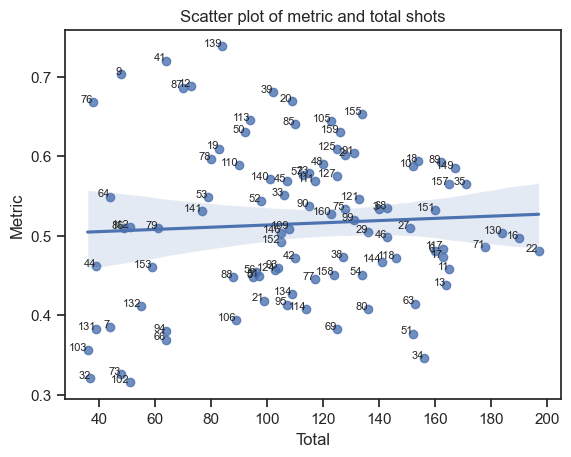

In [57]:
ax = sns.regplot(data=df, x="Total", y="metric")

# Annotate points with index
for i, txt in enumerate(df.index):
    ax.annotate(txt, (df['Total'].iloc[i], df['metric'].iloc[i]), fontsize=8, ha='right')

# Display the plot
plt.title('Scatter plot of metric and total shots')
plt.xlabel('Total')
plt.ylabel('Metric')
plt.show()

To observe the regrassion line in another way, this plot made for different leagues with usng seaborn library.

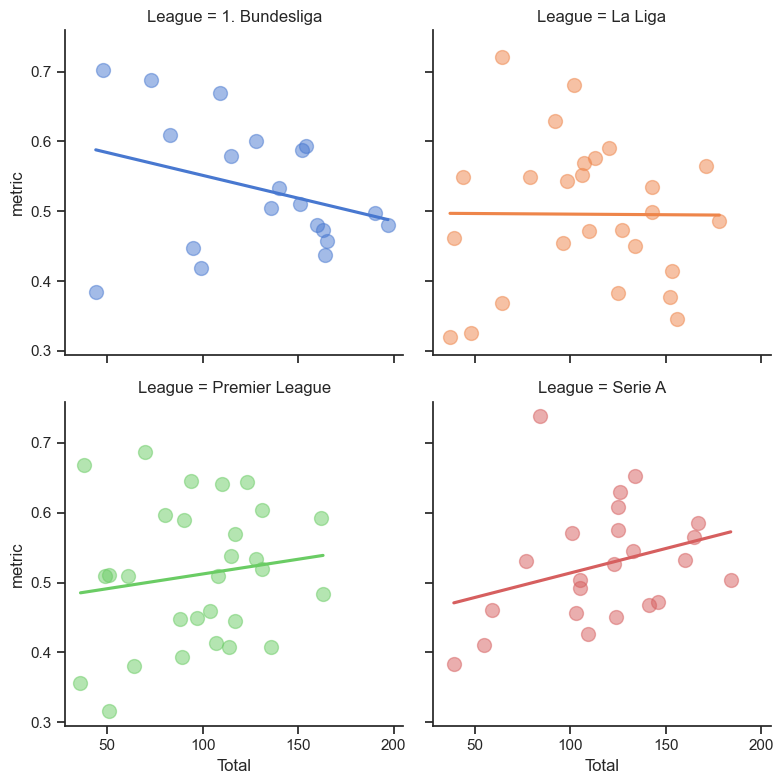

In [58]:
sns.set_theme(style="ticks")

g = sns.lmplot(
    data=df, x="Total", y="metric", col="League", hue="League",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 100, "alpha": 0.5}
)

As the graphs show, the regression slope for each league behaves in different ways, e.g. for goalkeepers in the Bundesliga, save rates tends to decrease as the number of shots increaed. But in Serie A and the Preimer league it tends to increase. In the Spanish league the rate is constant.

### 2-xG and Finishing relation

Like in the first example, the xG metric can also be used for finishing rates of players. In the dataset, every shots has xG stattistic so, this rate can be calculated easily with using this.

In [ ]:
This function finding the every shots which taken in a season. In the below of the function shot data of Top5 league(except Ligue 1) in 2015/2016 seasons is merging. 

In [59]:
def shot(season):
    shot = []
    league = season["competition"].iloc[0]
    cm = league["competition_name"]
    year = season["season"].iloc[0]["season_name"]
    shot_dataframe = []
        

    for ID in season["match_id"]:
        x = opurl(ID)
        print(ID)
        shot = x["shot"][x["shot"].notna()]
        a = x.iloc[shot.index]["player"]
        D = [[cm,s["name"],i["statsbomb_xg"],i["outcome"]["name"]] for i,s in zip(shot,a)]
        shot_dataframe += D
    print("season")
    return pd.DataFrame(shot_dataframe)

In [ ]:
df = pd.DataFrame()
for i,c in zip(Top5["competition_id"],Top5["season_id"]):
    sdf = opseason(i,c)
    df2 = shot(sdf)
    result = pd.concat([df, df2], ignore_index=True)
    df = result

Data saved locally. Column names arranged with their titles

In [66]:
Shot = pd.read_csv("shot.csv")
Shot.rename(columns={"Unnamed: 0": "i", "0":"league", "1": "Name", "2": "xG", "3": "outcome"}, inplace=True)
Shot

,i,league,Name,xG,outcome
0,0,1. Bundesliga,Tarik Elyounoussi,0.087901,Off T
1,1,1. Bundesliga,Klaas-Jan Huntelaar,0.160274,Goal
2,2,1. Bundesliga,Kevin Volland,0.016036,Blocked
3,3,1. Bundesliga,Jean-Eric Maxim Choupo-Moting,0.527759,Goal
4,4,1. Bundesliga,Klaas-Jan Huntelaar,0.074020,Saved
...,...,...,...,...,...
36900,36900,Serie A,Danilo Cataldi,0.030999,Blocked
36901,36901,Serie A,Franco Brienza,0.042634,Blocked
36902,36902,Serie A,Franco Brienza,0.038101,Wayward
36903,36903,Serie A,Matteo Brighi,0.063746,Saved


In [70]:
shot = Shot.groupby("Name").agg(
    Shots=('outcome', 'size'),
    Total_xG=('xG', 'sum')
).reset_index()


Goal = Shot[Shot["outcome"] == "Goal"]

# Calculate goal statistics
goal = Goal.groupby("Name").agg(
    Goals=('outcome', 'size'),
    Goal_xG=('xG', 'sum')
).reset_index()

# Merge shot and goal statistics on 'Name'
shot_DF = pd.merge(shot, goal, on="Name", how="left").fillna(0)
shot_dataframe = shot_DF[shot_DF["Shots"]>35]

And tih is the dataframe of xG for player. In this metric, was obtained by dividing the player's number of goals by the total xG of the positions he entered. As it can be seen from the data, according to the metric, James Rodrigues scored 7 goals from 2.2 expected goals. This means that this type of player is more prone to take advantage of difficult positions during the match.

In [76]:
shot_dataframe["Goal_per_xG"] = shot_dataframe["Goals"]/shot_dataframe["Total_xG"]
shot_dataframe["Avr_Shot_xG"] = shot_dataframe["Total_xG"]/shot_dataframe["Shots"]
shot_dataframe["metric"] = shot_dataframe["Goals"]/shot_dataframe["Total_xG"]
shot_dataframe.sort_values(by = "metric",ascending=False)[0:10]


C:\Users\ozdas\AppData\Local\Temp\ipykernel_15204\1584956282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_dataframe["Goal_per_xG"] = shot_dataframe["Goals"]/shot_dataframe["Total_xG"]
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15204\1584956282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_dataframe["Avr_Shot_xG"] = shot_dataframe["Total_xG"]/shot_dataframe["Shots"]
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15204\1584956282.py:3: SettingWithCopyWarning: 
A value is trying to be set 

,Name,Shots,Total_xG,Goals,Goal_xG,Goal_per_xG,Avr_Shot_xG,metric
711,James David Rodríguez Rubio,39,2.219939,7.0,0.660355,3.153240,0.056922,3.153240
760,Jesús Joaquín Fernández Sáez de la Torre,39,2.030836,6.0,0.758997,2.954448,0.052073,2.954448
699,Ja-Cheol Koo,40,3.480109,8.0,1.828913,2.298778,0.087003,2.298778
698,Iñaki Williams Arthuer,45,3.483108,8.0,1.700882,2.296799,0.077402,2.296799
1236,Nathan Redmond,53,2.683261,6.0,0.431705,2.236085,0.050628,2.236085
498,Fayçal Fajr,45,2.281699,5.0,0.750789,2.191349,0.050704,2.191349
61,Alessandro Florenzi,48,3.258029,7.0,1.284924,2.148538,0.067876,2.148538
574,Gareth Frank Bale,81,8.988328,19.0,4.460653,2.113853,0.110967,2.113853
447,Emanuele Giaccherini,46,3.527066,7.0,1.383634,1.984652,0.076675,1.984652
228,Bruno da Silva Peres,40,1.519230,3.0,0.381080,1.974684,0.037981,1.974684


### 3 Pass network of Barcelona

From dataset, it can be calculated the pass pairs. In the data, Barcelona team has 15 seasons of record. If we use this data, We can find the networks and find the who is the center of this pass network

As in the other lists, I had difficulty in detecting the edges of the weighted graphs in the dataframe because (a,b) and (b,a) are the same. Therefore, I used the set data structure. Thanks to this data structure, the order of the pairs was the same every time and I was able to calculate the weights more easily and quickly.Also, since nan values cause problems in functions, I had difficulty in detecting them. I overcame this problem by reading nan values as string. When I tried other ways (such as pd.natna(),np.isnan()) I could not get a definite result. I thought that translating to string was the easiest and most reliable method and I used it.

In [ ]:
L = []
for c,s in zip(LL['competition_id'],LL["season_id"]):
    sdf = opseason(c,s)
    for match_id in sdf["match_id"]: 
        df = opurl(match_id)
        for index,row in df.iterrows():
            if row["team"]["name"] == "Barcelona" and str(row["pass"]) != "nan":
                P = row["pass"]
                if "recipient" in P:
                    L += [{df.iloc[index]["player"]["name"],P["recipient"]["name"]}]
                else:
                    continue
        print(match_id)

In [ ]:
Data saved locally.

In [81]:
Barca_pass = pd.read_csv("Barcelona_Pass.csv")
pd.DataFrame(Barca_pass)

,Unnamed: 0,0,1
0,0,Sergio Busquets i Burgos,Antoine Griezmann
1,1,Sergio Busquets i Burgos,Frenkie de Jong
2,2,Gerard Piqué Bernabéu,Frenkie de Jong
3,3,Clément Lenglet,Gerard Piqué Bernabéu
4,4,Sergio Busquets i Burgos,Clément Lenglet
...,...,...,...
351492,351492,Henrik Larsson,Giovanni van Bronckhorst
351493,351493,Henrik Larsson,Andrés Iniesta Luján
351494,351494,Henrik Larsson,Lionel Andrés Messi Cuccittini
351495,351495,Juliano Haus Belletti,Henrik Larsson


Finding pairs how many  times passed with each other

In [82]:
A = Barca_pass[["0","1"]].groupby(["0","1"],as_index=False).size()
A

,0,1,size
0,Abel Ruiz Ortega,Carles Aleña Castillo,5
1,Abel Ruiz Ortega,Gerard Piqué Bernabéu,1
2,Abel Ruiz Ortega,Jasper Cillessen,2
3,Abel Ruiz Ortega,Jordi Alba Ramos,7
4,Abel Ruiz Ortega,Lionel Andrés Messi Cuccittini,3
...,...,...,...
2061,Óscar Mingueza García,Ronald Federico Araújo da Silva,121
2062,Óscar Mingueza García,Samuel Yves Umtiti,52
2063,Óscar Mingueza García,Sergi Roberto Carnicer,166
2064,Óscar Mingueza García,Sergino Dest,289


Craeting tuples for find the edges of network. ad filterin the pass number for 300

In [83]:
NN = [(r[0],r[1],r["size"]) for i,r in A.iterrows() if r["size"] > 300]
NN

[('Adriano Correia Claro', 'Javier Alejandro Mascherano', 939),
 ('Alexandre Dimitri Song-Billong', 'Andrés Iniesta Luján', 317),
 ('Alexis Alejandro Sánchez Sánchez', 'Andrés Iniesta Luján', 385),
 ('Alexis Alejandro Sánchez Sánchez', 'Daniel Alves da Silva', 970),
 ('Alexis Alejandro Sánchez Sánchez', 'Francesc Fàbregas i Soler', 528),
 ('Alexis Alejandro Sánchez Sánchez', 'Lionel Andrés Messi Cuccittini', 698),
 ('Alexis Alejandro Sánchez Sánchez', 'Xavier Hernández Creus', 614),
 ('Anderson Luís de Souza', 'Andrés Iniesta Luján', 751),
 ('Anderson Luís de Souza', 'Carles Puyol i Saforcada', 447),
 ('Anderson Luís de Souza', 'Gianluca Zambrotta', 302),
 ('Anderson Luís de Souza', 'Giovanni van Bronckhorst', 339),
 ('Anderson Luís de Souza', 'Lionel Andrés Messi Cuccittini', 723),
 ('Anderson Luís de Souza', 'Ronaldo de Assis Moreira', 817),
 ('Anderson Luís de Souza', 'Sylvio Mendes Campos Junior', 318),
 ('Anderson Luís de Souza', 'Xavier Hernández Creus', 677),
 ('Andrés Iniesta L

By using networkx, created weighted graph ann using gravis, drawn it.

In [88]:
G = nx.Graph()

G.add_weighted_edges_from(NN)

gv.vis(G,node_hover_neighborhood=False)

Fınding for the centralitiy, used this function. The top players are Lionel Messi, Xavi  and Andreas Iniesta. We can look at this and say that these three players have covered the majority of Barceloann's passes in the last 15 years. In 15 years, we can say that they interacted more with the other players than the others.

In [89]:
sorted(nx.centrality.betweenness_centrality(G).items(), key=lambda item: -item[1])[:10]

[('Lionel Andrés Messi Cuccittini', 0.2653190436322935),
 ('Xavier Hernández Creus', 0.14970345230860754),
 ('Andrés Iniesta Luján', 0.12784974643354663),
 ('Sergio Busquets i Burgos', 0.11994791980453581),
 ('Jordi Alba Ramos', 0.11800847375873229),
 ('Gerard Piqué Bernabéu', 0.08805500521867062),
 ('Carles Puyol i Saforcada', 0.055548338868036354),
 ('Frenkie de Jong', 0.04337592064452319),
 ('Javier Alejandro Mascherano', 0.041227713992439664),
 ('Daniel Alves da Silva', 0.022347779677753886)]

### 4 Strictness o Refrees

Using this function, every foul called in a match, who was fouled and the referee's decision were retrieved from the dataset. (This function just used for the 15/16 La liga because it takes long tie to get data.)

In [ ]:
Pulling data from dataset

In [ ]:
referee_df = pd.DataFrame()

for match_index, match_row in LL1516.iterrows():
    l = []
    df = opurl(match_row["match_id"])
    if str(match_row["referee"]) == "nan":
        referee = None
    else:
        referee = match_row["referee"]['name']
    
    for index, row in df.iterrows():
        if row["type"]["name"] is not None and "Foul" in row["type"]["name"]:
            l.append(index)
        ref = df[["timestamp","team","player","type","foul_committed"]].iloc[l].reset_index()
        ref["referee"] = referee
    referee_df = pd.concat([referee_df, ref], ignore_index=True)
    print(match_index)

In [ ]:
referee_df

In [ ]:
A = referee_df.copy()

def extract_name(d):
    # Check if d is not NaN and is a dictionary with the key 'name'
    if not str(d) == "nan" and 'name' in d:
        return d['name']
    else:
        return None

import pandas as pd

# Assuming A is your DataFrame
for col in ['team', 'player', 'type' ]:
    A[col] = A[col].apply(extract_name)
A

Arranging the card types and advanteges

In [ ]:
J = []
for i,r in A.iterrows():
    P = r["foul_committed"]
    if str(P) == "nan":
        J.append("None")
    elif "card"  in P:
        J.append(P["card"]["name"])
    elif "advantage" in P:
        J.append("adv")
    else:
        J.append("None")

In [ ]:
Arranged data

In [ ]:
A["foul_committed"] = J
#A.to_csv("ref.csv")

In [ ]:
Saved Locally

In [91]:
ref_data = pd.read_csv("ref.csv")
ref_data

,Unnamed: 0,index,timestamp,team,player,type,foul_committed,referee
0,0,116,00:03:44.813,Eibar,Borja González Tomás,Foul Committed,None,NaN
1,1,117,00:03:44.813,Levante UD,Zouhair Feddal,Foul Won,None,NaN
2,2,147,00:04:33.855,Levante UD,Víctor Casadesús Castaño,Foul Committed,None,NaN
3,3,148,00:04:33.855,Eibar,Daniel García Carrillo,Foul Won,None,NaN
4,4,330,00:11:21.719,Levante UD,Nabil Ghilas,Foul Committed,None,NaN
...,...,...,...,...,...,...,...,...
23705,23705,3148,00:34:37.647,Barcelona,Sergio Busquets i Burgos,Foul Won,None,David Fernández Borbalan
23706,23706,3416,00:40:09.171,Barcelona,Neymar da Silva Santos Junior,Foul Committed,Yellow Card,David Fernández Borbalan
23707,23707,3417,00:40:09.171,Valencia,João Pedro Cavaco Cancelo,Foul Won,None,David Fernández Borbalan
23708,23708,3545,00:44:51.673,Valencia,André Filipe Tavares Gomes,Foul Committed,None,David Fernández Borbalan


In [ ]:
Filtering of lines where the referee gives a foul

In [92]:
F_Com = ref_data[ref_data["type"] == "Foul Committed"]
F_Com

,Unnamed: 0,index,timestamp,team,player,type,foul_committed,referee
0,0,116,00:03:44.813,Eibar,Borja González Tomás,Foul Committed,None,NaN
2,2,147,00:04:33.855,Levante UD,Víctor Casadesús Castaño,Foul Committed,None,NaN
4,4,330,00:11:21.719,Levante UD,Nabil Ghilas,Foul Committed,None,NaN
6,6,345,00:11:48.328,Eibar,Gonzalo Escalante,Foul Committed,None,NaN
8,8,421,00:14:49.750,Eibar,Takashi Inui,Foul Committed,None,NaN
...,...,...,...,...,...,...,...,...
23700,23700,2943,00:28:55.201,Valencia,João Pedro Cavaco Cancelo,Foul Committed,None,David Fernández Borbalan
23702,23702,3112,00:33:23.275,Barcelona,Ivan Rakitić,Foul Committed,None,David Fernández Borbalan
23704,23704,3147,00:34:37.647,Valencia,Javier Fuego Martínez,Foul Committed,None,David Fernández Borbalan
23706,23706,3416,00:40:09.171,Barcelona,Neymar da Silva Santos Junior,Foul Committed,Yellow Card,David Fernández Borbalan


In [ ]:
Countng the punishments(red card, yellow card)

In [93]:
A = F_Com.groupby(["referee","foul_committed"],as_index=False).size()
A

,referee,foul_committed,size
0,Alberto Undiano Mallenco,None,506
1,Alberto Undiano Mallenco,Red Card,1
2,Alberto Undiano Mallenco,Second Yellow,4
3,Alberto Undiano Mallenco,Yellow Card,90
4,Alberto Undiano Mallenco,adv,97
...,...,...,...
89,Xavier Estrada Fernández,None,480
90,Xavier Estrada Fernández,Red Card,2
91,Xavier Estrada Fernández,Second Yellow,5
92,Xavier Estrada Fernández,Yellow Card,93


(In this section, I decided to add the referees' match numbers to this dataset.) 

In [94]:
url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/27.json"
response = requests.get(url)
json_data = response.json()
LL1516 = pd.DataFrame(json_data)
LL1516

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,3825848,2015-09-23,20:00:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 221, 'home_team_name': 'Levan...","{'away_team_id': 322, 'away_team_name': 'Eibar...",2,2,available,unscheduled,2023-02-21T15:19:45.745471,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 350, 'name': 'Estadio Ciudad de Valenci...",NaN
1,3825895,2015-09-23,22:00:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 208, 'home_team_name': 'Las P...","{'away_team_id': 213, 'away_team_name': 'Sevil...",2,0,available,unscheduled,2023-02-21T15:19:07.927548,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 357, 'name': 'Estadio de Gran Canaria',...","{'id': 2728, 'name': 'Carlos del Cerro Grande'..."
2,3825894,2016-05-01,18:15:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 219, 'home_team_name': 'RC De...","{'away_team_id': 216, 'away_team_name': 'Getaf...",0,2,available,unscheduled,2022-08-30T12:53:16.828350,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 4658, 'name': 'Estadio Abanca-Riazor', ...","{'id': 1008, 'name': 'Carlos Clos Gómez', 'cou..."
3,3825855,2016-05-02,20:30:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 223, 'home_team_name': 'Málag...","{'away_team_id': 221, 'away_team_name': 'Levan...",3,1,available,unscheduled,2022-08-30T12:53:53.790835,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 346, 'name': 'Estadio La Rosaleda', 'co...","{'id': 2480, 'name': 'Iñaki Bikandi Garrido', ..."
4,3825908,2016-05-15,19:00:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 214, 'home_team_name': 'Espan...","{'away_team_id': 322, 'away_team_name': 'Eibar...",4,2,available,unscheduled,2022-04-06T22:39:49.425989,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 2692, 'name': 'Mario Melero López', 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,266467,2015-09-23,20:00:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 209, 'home_team_name': 'Celta...","{'away_team_id': 217, 'away_team_name': 'Barce...",4,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 221, 'name': 'Alberto Undiano Mallenco'..."
376,267273,2016-02-20,17:00:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 208, 'home_team_name': 'Las P...","{'away_team_id': 217, 'away_team_name': 'Barce...",1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",25,"{'id': 1, 'name': 'Regular Season'}","{'id': 357, 'name': 'Estadio de Gran Canaria',...",NaN
377,266490,2015-09-20,20:30:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 27, 'season_name': '2015/2016'}","{'home_team_id': 217, 'home_team_name': 'Barce...","{'away_team_id': 221, 'away_team_name': 'Levan...",4,1,available,scheduled,2022-08-30T10:30:18.594970,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fide

In [95]:
Count = []
for i,r in LL1516.iterrows():
    if str(r["referee"]) != "nan":
        Count.append(r["referee"]["name"])
    else:
        continue

In [96]:
C = pd.DataFrame(Count,columns=["referee"])
C = C.groupby("referee",as_index=False).size()
C

,referee,size
0,Alberto Undiano Mallenco,22
1,Alejandro José Hernández Hernández,17
2,Alfonso Álvarez Izquierdo,18
3,Antonio Miguel Mateu Lahoz,20
4,Carlos Clos Gómez,21
5,Carlos Velasco Carballo,17
6,Carlos del Cerro Grande,17
7,David Fernández Borbalan,19
8,Eduardo Prieto Iglesias,20
9,Ignacio Iglesias Villanueva,19


Merging match numbers and referees. We then normalise this data by dividing it by the number of matches referees ruled by match.

In [98]:
Ref_Foul = pd.merge(A,C,on="referee",how = "inner")
Ref_Foul.rename(columns={"size_x":"fouls","size_y":"matches","foul_committed":"outcome"},inplace=True)
Ref_Foul["fouls_per_match"] = Ref_Foul['fouls']/Ref_Foul["matches"]
Ref_Foul

,referee,outcome,fouls,matches,fouls_per_match
0,Alberto Undiano Mallenco,None,506,22,23.000000
1,Alberto Undiano Mallenco,Red Card,1,22,0.045455
2,Alberto Undiano Mallenco,Second Yellow,4,22,0.181818
3,Alberto Undiano Mallenco,Yellow Card,90,22,4.090909
4,Alberto Undiano Mallenco,adv,97,22,4.409091
...,...,...,...,...,...
89,Xavier Estrada Fernández,None,480,20,24.000000
90,Xavier Estrada Fernández,Red Card,2,20,0.100000
91,Xavier Estrada Fernández,Second Yellow,5,20,0.250000
92,Xavier Estrada Fernández,Yellow Card,93,20,4.650000


If we look at this this figure, Inaki Bikando Garrido has made more strict judgements than any other referee because he gave more foul decisions per match. It can also be said that the tempo of the match was low because there were more pauses in the matches he managed.

<Figure size 1200x600 with 0 Axes>

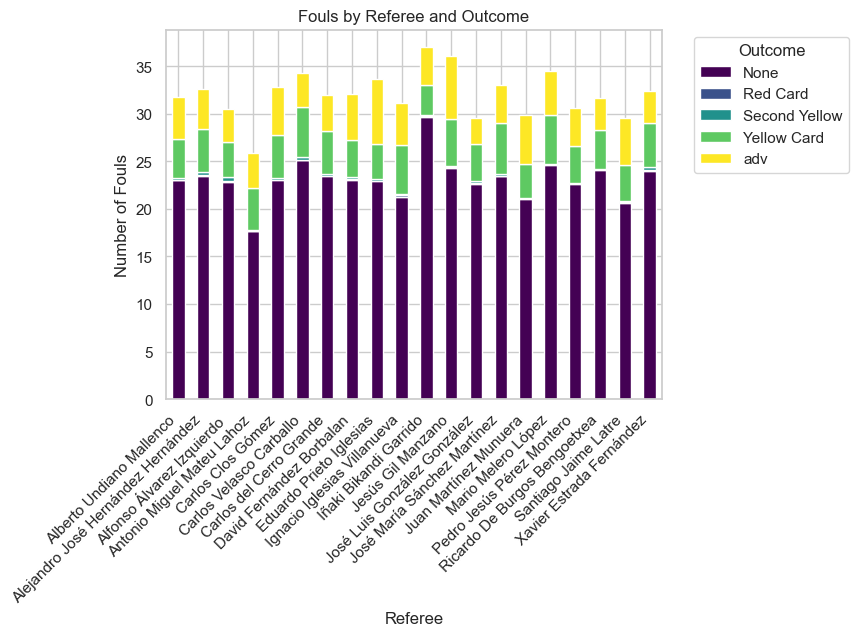

In [99]:
sns.set(style="whitegrid")

# Pivot the DataFrame to have outcomes as columns
pivot_df = Ref_Foul.pivot_table(index='referee', columns='outcome', values='fouls_per_match', aggfunc='sum', fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
stacked_bar_plot = pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# Customize the plot
plt.title('Fouls by Referee and Outcome')
plt.xlabel('Referee')
plt.ylabel('Number of Fouls')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### 4.1 Foul relations

By using the same dataset with the refreee problem, we can find the relation of player with using commited fouls with each other. In dataframe, Wonned fauls are assigned and each wonned fauls has related with commited faul.(But each committed faul has not wonned fauls as relation.)

Data taken as set becuse find the each pair correctly

In [101]:
FN = []
for i,r in ref_data.iterrows():
    if i+1 < len(ref_data) and r["type"] == "Foul Committed":
         if ref_data.iloc[i+1]["type"] == "Foul Won" and r["timestamp"] == ref_data.iloc[i+1]["timestamp"]: 
            FN += [{r["player"],ref_data.iloc[i+1]["player"]}]


In [102]:
FN

[{'Borja González Tomás', 'Zouhair Feddal'},
 {'Daniel García Carrillo', 'Víctor Casadesús Castaño'},
 {'David Juncà Reñé', 'Nabil Ghilas'},
 {'Gonzalo Escalante', 'Víctor Casadesús Castaño'},
 {'José María Martín-Bejarano Serrano', 'Takashi Inui'},
 {'Borja González Tomás', 'José María Martín-Bejarano Serrano'},
 {'José María Martín-Bejarano Serrano', 'Sergio Gontán Gallardo'},
 {'Adrián González Morales', 'José María Martín-Bejarano Serrano'},
 {'José Luis Morales Nogales', 'Takashi Inui'},
 {'Borja González Tomás', 'José María Martín-Bejarano Serrano'},
 {'Aleksandar Pantić', 'Nabil Ghilas'},
 {'Borja González Tomás', 'Juan Francisco García García'},
 {'Jefferson Andrés Lerma Solís', 'Takashi Inui'},
 {'Jefferson Andrés Lerma Solís', 'Takashi Inui'},
 {'David Juncà Reñé', 'Jefferson Andrés Lerma Solís'},
 {'Antonio García Aranda', 'Sergio Gontán Gallardo'},
 {'Rubén García Santos', 'Sergio Gontán Gallardo'},
 {'Aleksandar Pantić', 'Víctor Camarasa Ferrando'},
 {'Takashi Inui', 'Víct

In [103]:
for i in range(len(FN)):
    FN[i] = tuple(FN[i])
FN

[('Borja González Tomás', 'Zouhair Feddal'),
 ('Daniel García Carrillo', 'Víctor Casadesús Castaño'),
 ('Nabil Ghilas', 'David Juncà Reñé'),
 ('Gonzalo Escalante', 'Víctor Casadesús Castaño'),
 ('José María Martín-Bejarano Serrano', 'Takashi Inui'),
 ('Borja González Tomás', 'José María Martín-Bejarano Serrano'),
 ('José María Martín-Bejarano Serrano', 'Sergio Gontán Gallardo'),
 ('Adrián González Morales', 'José María Martín-Bejarano Serrano'),
 ('José Luis Morales Nogales', 'Takashi Inui'),
 ('Borja González Tomás', 'José María Martín-Bejarano Serrano'),
 ('Aleksandar Pantić', 'Nabil Ghilas'),
 ('Borja González Tomás', 'Juan Francisco García García'),
 ('Takashi Inui', 'Jefferson Andrés Lerma Solís'),
 ('Takashi Inui', 'Jefferson Andrés Lerma Solís'),
 ('Jefferson Andrés Lerma Solís', 'David Juncà Reñé'),
 ('Antonio García Aranda', 'Sergio Gontán Gallardo'),
 ('Rubén García Santos', 'Sergio Gontán Gallardo'),
 ('Víctor Camarasa Ferrando', 'Aleksandar Pantić'),
 ('Víctor Camarasa Ferr

In [104]:
df = pd.DataFrame(FN)
Ndf = df.groupby([0,1],as_index=False).size()
Ndf

,0,1,size
0,Abdoul Karim Yoda,Alberto Lora Ramos,1
1,Abdoul Karim Yoda,André Filipe Tavares Gomes,1
2,Abdoul Karim Yoda,Aythami Artiles Oliva,1
3,Abdoul Karim Yoda,Hugo Miguel Almeida Costa Lopes,1
4,Abdoul Karim Yoda,Isaac Ajayi Success,5
...,...,...,...
8685,Óscar de Marcos Arana,Manuel Agudo Durán,1
8686,Óscar de Marcos Arana,Marco Asensio Willemsen,1
8687,Óscar de Marcos Arana,Mikel Oyarzabal Ugarte,1
8688,Óscar de Marcos Arana,Nordin Amrabat,1


In [105]:
N = []
for i, r in Ndf.iterrows():
    if r["size"] > 3:
        N.append((r[0], r[1], r["size"]))

In [106]:
G = nx.Graph()
G.add_weighted_edges_from(N)

gv.vis(G,node_hover_neighborhood=True)

In the centrality data, we can say, this players engage in more duelling than other players so they won or committed fouls.

In [107]:
sorted(nx.centrality.betweenness_centrality(G).items(), key=lambda item: -item[1])[:10]

[('Neymar da Silva Santos Junior', 0.16538762264568715),
 ('Petros Matheus dos Santos Araújo', 0.14093785029268902),
 ('Pedro Pablo Hernández', 0.1332771481158577),
 ('Raúl García Escudero', 0.12612238967077688),
 ('Rubén Rochina Naixes', 0.10112854790274144),
 ('José Vicente Gómez Umpiérrez', 0.08608557866622386),
 ('Jorge Resurrección Merodio', 0.08069491150136311),
 ('Roque Mesa Quevedo', 0.07884591965237128),
 ('Javier López Rodríguez', 0.07422731487247611),
 ('Íñigo Martínez Berridi', 0.06303351738835611)]

In [ ]:
### 5 Goal assits relations

In [ ]:
for c,s in zip(Top5['competition_id'],Top5["season_id"]):
    sdf = opseason(c,s)
    for ID in sdf['match_id']:
        df = opurl(ID)
        DF = df[df["pass"].notna()]
        for i,r in DF.iterrows():
            pas = r["pass"]
            if "goal_assist" in pas:
                #goal-assist
                L += [[pas["recipient"]["name"],r["player"]["name"]]]
        print(ID)

In [ ]:
assist_goal =pd.DataFrame(L,columns=["assist","goal"])
assist_goal

In [ ]:
A = L.copy()
for i in range(len(A)):
    A[i] = list(set(A[i]))

AA = pd.DataFrame(A)
GA = AA.groupby([0,1],as_index=False).size().sort_values(by = "size",ascending=False).reset_index()



Asist_Goal = assist_goal.groupby(["assist","goal"],as_index=False).size()
DATA = Asist_Goal.sort_values(by="size",ascending=False).reset_index()
DATA

In [ ]:
#DATA.to_csv("goal-assist.csv")

In [108]:
GA = pd.read_csv("goal-assist.csv")
GA

,Unnamed: 0,index,assist,goal,size
0,0,616,Luis Alberto Suárez Díaz,Lionel Andrés Messi Cuccittini,8
1,1,721,Neymar da Silva Santos Junior,Luis Alberto Suárez Díaz,7
2,2,617,Luis Alberto Suárez Díaz,Neymar da Silva Santos Junior,7
3,3,79,Antoine Griezmann,Jorge Resurrección Merodio,6
4,4,775,Pierre-Emerick Aubameyang,Gonzalo Castro Randon,5
...,...,...,...,...,...
1017,1017,373,Hernán Jorge Crespo,Ricardo Izecson dos Santos Leite,1
1018,1018,374,Hiroki Sakai,Ádám Szalai,1
1019,1019,375,Hiroshi Kiyotake,Manuel Schmiedebach,1
1020,1020,376,Hiroshi Kiyotake,Noah-Joel Sarenren-Bazee,1
